[View in Colaboratory](https://colab.research.google.com/github/KJStrand/MEG_data/blob/master/plot_vector_mne_solution.ipynb)

In [0]:
%matplotlib inline
import numpy as np


# Plotting the full MNE solution


The source space that is used for the inverse computation defines a set of
dipoles, distributed across the cortex. When visualizing a source estimate, it
is sometimes useful to show the dipole directions, as well as their estimated
magnitude.



In [0]:
# Author: Marijn van Vliet <w.m.vanvliet@gmail.com>
#
# License: BSD (3-clause)
import mne
from mne.datasets import sample
from mne.minimum_norm import read_inverse_operator, apply_inverse

print(__doc__)

data_path = sample.data_path()
subjects_dir = data_path + '/subjects'

# Read evoked data
fname_evoked = data_path + '/MEG/sample/sample_audvis-ave.fif'
evoked = mne.read_evokeds(fname_evoked, condition=0, baseline=(None, 0))

# Read inverse solution
fname_inv = data_path + '/MEG/sample/sample_audvis-meg-oct-6-meg-inv.fif'
inv = read_inverse_operator(fname_inv)

# Apply inverse solution, set pick_ori='vector' to obtain a
# :class:`mne.VectorSourceEstimate` object
snr = 3.0
lambda2 = 1.0 / snr ** 2
stc = apply_inverse(evoked, inv, lambda2, 'dSPM', pick_ori='vector')

# Use peak getter to move vizualization to the time point of the peak magnitude
_, peak_time = stc.magnitude().get_peak(hemi='lh')

Automatically created module for IPython interactive environment
Successfully extracted to: [u'/home/ubuntu/mne_data/MNE-sample-data']
Reading /home/ubuntu/mne_data/MNE-sample-data/MEG/sample/sample_audvis-ave.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Left Auditory)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
Applying baseline correction (mode: mean)
Reading inverse operator decomposition from /home/ubuntu/mne_data/MNE-sample-data/MEG/sample/sample_audvis-meg-oct-6-meg-inv.fif...
    Reading inverse operator info...
    [done]
    Reading inverse operator decomposition...
    [done]
    305 x 305 full covariance (kind = 1) found.
    Read a total of 4 project

In [0]:
stc.data

array([[[ 0.26651136,  0.07478824, -0.08558519, ..., -0.67254477,
         -0.79367162, -0.91293641],
        [ 0.01661674,  0.35906034,  0.61604228, ...,  1.30178712,
          1.4410594 ,  1.55715204],
        [ 0.17631357,  0.29209357,  0.36853678, ...,  0.51332614,
          0.54603994,  0.56810176]],

       [[-0.43390335, -0.41473637, -0.36539822, ...,  0.3394102 ,
          0.12650981,  0.08894366],
        [-0.1165118 , -0.10659303, -0.09140589, ...,  0.53355175,
          0.40673934,  0.36288217],
        [-0.27946278, -0.2040277 , -0.12385276, ...,  0.64938295,
          0.62224776,  0.57753636]],

       [[ 0.17988724,  0.20802247,  0.22751853, ...,  0.1367186 ,
          0.1120149 ,  0.06584372],
        [ 0.0757636 ,  0.15181021,  0.20616895, ...,  1.02846031,
          0.97329639,  0.92465243],
        [ 0.21474424,  0.43783308,  0.59742373, ...,  2.98403884,
          2.8228465 ,  2.6672005 ]],

       ..., 
       [[ 0.47413943,  0.55409755,  0.62414819, ..., -1.2570679

In [0]:
# I think these refer to left hemisphere and right hemisphere
stc.vertices[0].shape + stc.vertices[1].shape

(3732, 3766)

In [0]:
# 7498 vectors that have 3 dimensions each, 421 time steps.
stc.data.shape

(7498, 3, 421)

In [0]:
# Plot the source estimate
# brain = stc.plot(initial_time=peak_time, hemi='lh', subjects_dir=subjects_dir)

In [0]:
# from os import path as op

# import mne
# from mne.forward import make_forward_dipole
# from mne.evoked import combine_evoked
# from mne.simulation import simulate_evoked

# data_path = mne.datasets.sample.data_path()
# subjects_dir = op.join(data_path, 'subjects')
# fname_ave = op.join(data_path, 'MEG', 'sample', 'sample_audvis-ave.fif')
# fname_cov = op.join(data_path, 'MEG', 'sample', 'sample_audvis-cov.fif')
# fname_bem = op.join(subjects_dir, 'sample', 'bem', 'sample-5120-bem-sol.fif')
# fname_trans = op.join(data_path, 'MEG', 'sample',
#                       'sample_audvis_raw-trans.fif')
# fname_surf_lh = op.join(subjects_dir, 'sample', 'surf', 'lh.white')

# evoked = mne.read_evokeds(fname_ave, condition='Right Auditory',
#                           baseline=(None, 0))
# evoked.pick_types(meg=True, eeg=False)
# evoked_full = evoked.copy()
# #evoked.crop(0.07, 0.08)

# # Fit a dipole
# dips = mne.fit_dipole(evoked, fname_cov, fname_bem, fname_trans)

In [0]:
# dips[0].pos[420]

In [0]:
# All .fif files in the sample data set.

# all-trans.fif
# ernoise-cov.fif
# ernoise_raw-eve.fif
# ernoise_raw.fif
# sample_audvis-ave.fif
# sample_audvis-cov.fif
# sample_audvis_ecg-eve.fif
# sample_audvis_ecg-proj.fif
# sample_audvis-eeg-oct-6-eeg-inv.fif
# sample_audvis-eeg-oct-6-fwd.fif
# sample_audvis-eeg-oct-6p-fwd.fif
# sample_audvis_eog-eve.fif
# sample_audvis_eog-proj.fif
# sample_audvis_filt-0-40_raw-eve.fif
# sample_audvis_filt-0-40_raw.fif
# sample_audvis-meg-eeg-oct-6-fwd.fif
# sample_audvis-meg-eeg-oct-6-meg-eeg-diagnoise-inv.fif
# sample_audvis-meg-eeg-oct-6-meg-eeg-inv.fif
# sample_audvis-meg-oct-6-fwd.fif
# sample_audvis-meg-oct-6-meg-diagnoise-inv.fif
# sample_audvis-meg-oct-6-meg-fixed-inv.fif
# sample_audvis-meg-oct-6-meg-inv.fif
# sample_audvis-meg-oct-6-meg-nodepth-fixed-inv.fif
# sample_audvis-meg-vol-7-fwd.fif
# sample_audvis-meg-vol-7-meg-inv.fif
# sample_audvis-no-filter-ave.fif
# sample_audvis_raw-eve.fif
# sample_audvis_raw.fif
# sample_audvis_raw-trans.fif
# sample_audvis-shrunk-cov.fif

In [0]:
# Get the position of dipoles in the brain

# from mayavi import mlab
import mne
from mne.datasets import sample
from mne.minimum_norm import make_inverse_operator, apply_inverse

data_path = sample.data_path()
evokeds = mne.read_evokeds(data_path + '/MEG/sample/sample_audvis-ave.fif')
left_auditory = evokeds[0].apply_baseline()
fwd = mne.read_forward_solution(
    data_path + '/MEG/sample/sample_audvis-meg-eeg-oct-6-fwd.fif',
    surf_ori=True)
noise_cov = mne.read_cov(data_path + '/MEG/sample/sample_audvis-cov.fif')
subjects_dir = data_path + '/subjects'

Successfully extracted to: [u'/home/ubuntu/mne_data/MNE-sample-data']
Reading /home/ubuntu/mne_data/MNE-sample-data/MEG/sample/sample_audvis-ave.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Left Auditory)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Right Auditory)
        0 CTF compensation matrices available
        nave = 61 - aspect type = 100
Projections have already been appl

<ipython-input-16-fafe51e3ba0e>:13: DeprecationWarning: surf_ori is deprecated and will be removed in 0.16. For handling transformations, apply convert_forward_solution after read_forward_solution instead.
  surf_ori=True)


    Desired named matrix (kind = 3523) not available
    Read MEG forward solution (7498 sources, 306 channels, free orientations)
    Desired named matrix (kind = 3523) not available
    Read EEG forward solution (7498 sources, 60 channels, free orientations)
    MEG and EEG forward solutions combined
    Source spaces transformed to the forward solution coordinate frame
    Average patch normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
    366 x 366 full covariance (kind = 1) found.
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active


In [0]:
lh = fwd['src'][0]  # Visualize the left hemisphere
verts = lh['rr']  # The vertices of the source space
tris = lh['tris']  # Groups of three vertices that form triangles
dip_pos = lh['rr'][lh['vertno']]  # The position of the dipoles
white = (1.0, 1.0, 1.0)  # RGB values for a white color
gray = (0.5, 0.5, 0.5)  # RGB values for a gray color
red = (1.0, 0.0, 0.0)  # RGB valued for a red color

# mlab.figure(size=(600, 400), bgcolor=white)

# # Plot the cortex
# mlab.triangular_mesh(verts[:, 0], verts[:, 1], verts[:, 2], tris, color=gray)

# # Mark the position of the dipoles with small red dots
# mlab.points3d(dip_pos[:, 0], dip_pos[:, 1], dip_pos[:, 2], color=red,
#               scale_factor=1E-3)

# mlab.view(azimuth=180, distance=0.25)

In [0]:
dip_pos.shape

(3732, 3)

The left hemisphere for the sample file has 3732 dipoles, while the right hemisphere has 3766. 3732+3766=7498, which is how many we see above. There are 421 time samples.

In [0]:
stc

<VectorSourceEstimate  |  7498 vertices, subject : sample, tmin : -199.795213158 (ms), tmax : 499.488032896 (ms), tstep : 1.66496010965 (ms), data shape : (7498, 3, 421)>

In [0]:
dip_list= dip_pos[:1000].tolist()
x, y, z, u, v, w = np.random.random((6, 1000))*2-1
print x.shape

dip_pos[:1000]

(1000,)


array([[-0.01604265, -0.04790326,  0.09510136],
       [-0.02085803, -0.04012932,  0.10417885],
       [-0.02141999, -0.05089982,  0.08986362],
       ..., 
       [-0.04688215, -0.02176697,  0.05546371],
       [-0.05559965, -0.02279563,  0.05411318],
       [-0.0272911 , -0.02335878,  0.05500043]])

In [0]:
x = dip_pos[:1000, 0]
y = dip_pos[:1000, 1]
z = dip_pos[:1000, 2]

In [0]:
stc.data[:1000].shape

(1000, 3, 421)

In [0]:
print stc.data[:,:,0]

[[ 0.26651136  0.01661674  0.17631357]
 [-0.43390335 -0.1165118  -0.27946278]
 [ 0.17988724  0.0757636   0.21474424]
 ..., 
 [ 0.47413943  1.04510558 -0.41229354]
 [ 0.06182769 -0.42490443  0.10636397]
 [-0.23657413  0.45832219  0.94577653]]


In [0]:
no_time_stc = stc.data[:,:,0]
print no_time_stc.shape
print no_time_stc[:1000].shape

u = no_time_stc[:1000, 0]
v = no_time_stc[:1000, 1]
w = no_time_stc[:1000, 2]

(7498, 3)
(1000, 3)


## Time to Plot!

In [0]:
import ipyvolume as ipv
import numpy as np

x, y, z, u, v, w = np.random.random((6, 1000))*2-1 #Random initializer to test if plot is working

num_dipoles = 3732

x = dip_pos[:num_dipoles, 0]
y = dip_pos[:num_dipoles, 1]
z = dip_pos[:num_dipoles, 2]

#Looking at only the first time slice out of 421 time slices
u = no_time_stc[:num_dipoles, 0] 
v = no_time_stc[:num_dipoles, 1]
w = no_time_stc[:num_dipoles, 2]

print u.shape
print v.shape
print w.shape

ipv.pylab.xlim(0,0.01)
ipv.pylab.ylim(0,0.01)
ipv.pylab.zlim(0,0.01)

u_t = v_t = w_t = 0

selected = np.random.randint(0, 1000, 100)
# ipv.figure()
quiver = ipv.quiver(x, y, z, u, v, w, size=1, size_selected=1, selected=selected)
# quiver = ipv.quiver(x, y, z, stc.data[:,:,u_t][:num_dipoles, 0],
                             # stc.data[:,:,v_t][:num_dipoles, 1], 
                             # stc.data[:,:,w_t][:num_dipoles, 2], size=1, size_selected=1, selected=selected)

# quiver = ipv.quiver(x, y, z, u, v, w, size=1)

# from ipywidgets import FloatSlider, ColorPicker, VBox, jslink
# time = FloatSlider(min=0, max=420, step=1)
# size_selected = FloatSlider(min=0, max=30, step=0.1)
# color = ColorPicker()
# color_selected = ColorPicker()
# jslink((quiver, 'time'), (u_t, 'value'))
# jslink((quiver, 'time'), (v_t, 'value'))
# jslink((quiver, 'time'), (w_t, 'value'))
# jslink((quiver, 'size_selected'), (size_selected, 'value'))
# jslink((quiver, 'color'), (color, 'value'))
# jslink((quiver, 'color_selected'), (color_selected, 'value'))
# VBox([ipv.gcc(), size, size_selected, color, color_selected])

(3732,)
(3732,)
(3732,)


In [0]:
stc.data[:,:,2][:num_dipoles, 0]

(3732,)
(3732,)
(3732,)
(3732,)
(3732,)
(3732,)


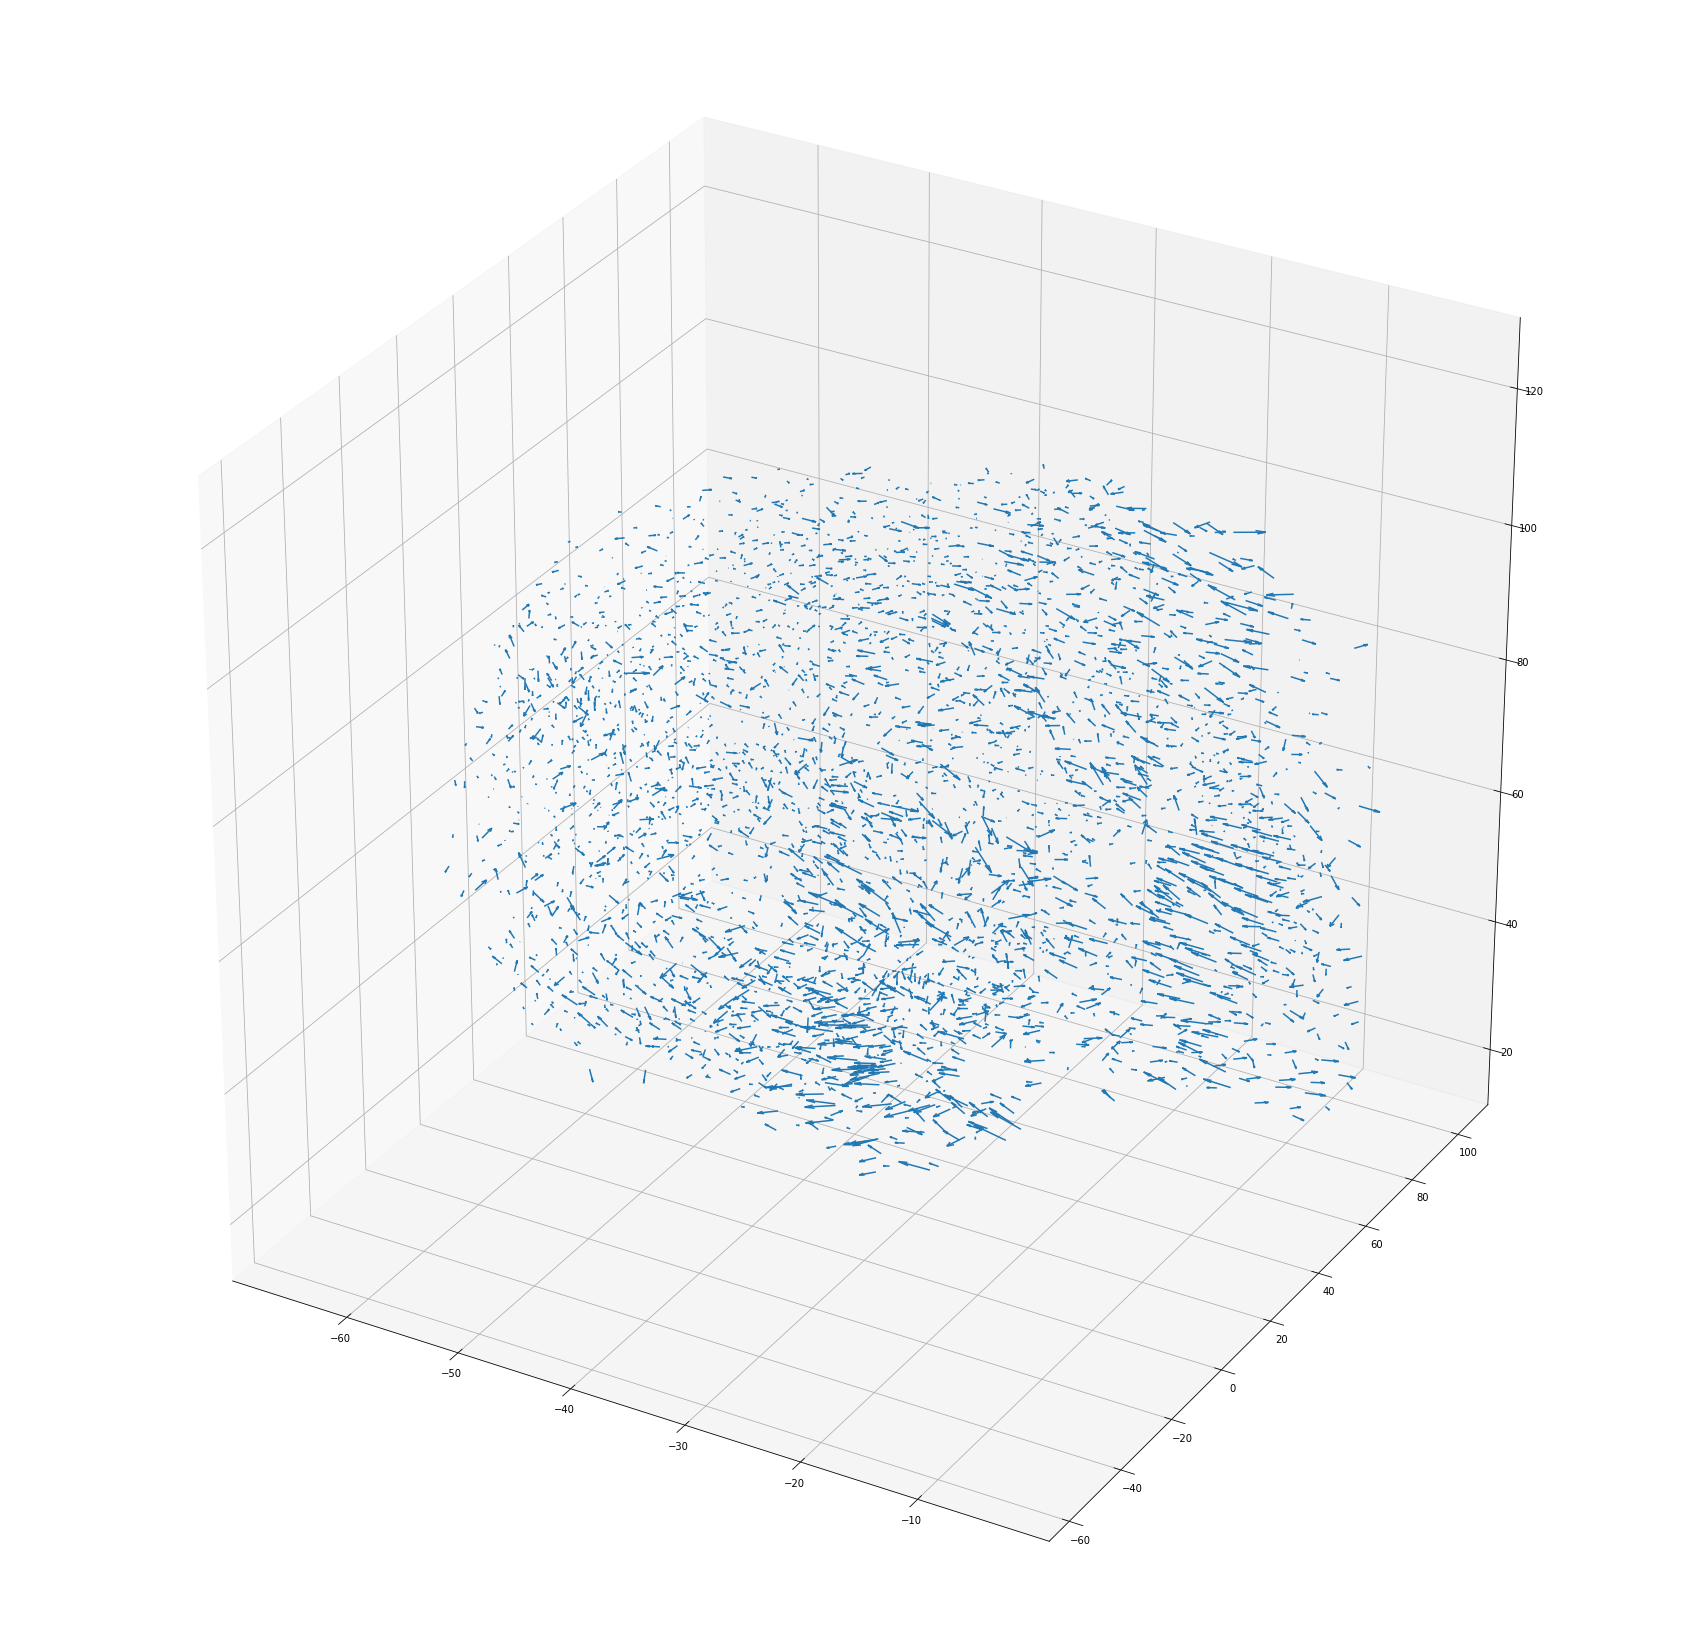

In [0]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

num_dipoles_lh = 3732#7498

x = dip_pos[:num_dipoles_lh, 0]
y = dip_pos[:num_dipoles_lh, 1]
z = dip_pos[:num_dipoles_lh, 2]

u = no_time_stc[:num_dipoles_lh, 0]
v = no_time_stc[:num_dipoles_lh, 1]
w = no_time_stc[:num_dipoles_lh, 2]

fig = plt.figure(figsize=(30,30))
ax = fig.gca(projection='3d')

# # Make the grid
# x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
#                       np.arange(-0.8, 1, 0.2),
#                       np.arange(-0.8, 1, 0.8))

# # Make the direction data for the arrows
# u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
# v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
# w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
#      np.sin(np.pi * z))

print x.shape
print y.shape
print z.shape
print u.shape
print v.shape
print w.shape

ax.quiver(x*1000, y*1000, z*1000, u, v, w, normalize=False)

plt.show()